In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-23.059159568287214 23.036712588090694
76.83031295453083 48.942614780128
71.92311693490308 -125.4812688856536
-18.690157582139292 -76.94495075001568
-57.60682093809447 -62.712769680840225
57.062691661313096 -111.80298537302448
-28.513680447592314 -29.542742423865405
-83.35183969649707 61.91352317985675
4.497697533982219 -36.64440076395368
5.738072990318912 -164.36172432791864
79.03845936634261 5.504113034390571
28.89020876728378 -78.14357500667234
62.606121698446145 138.49710497415145
-29.21995458417458 169.25633979754485
29.55812463905417 -13.859656739111188
31.70312319915452 -21.52441129095405
-46.92766301751327 140.64352096157836
-22.02983657086088 26.74422784578266
12.524207231908349 -17.479085863934557
-12.324845245536125 91.15703135101535
-49.93208930465759 89.98733518833029
2.6255899427782765 26.249853778534003
-48.28614937446 110.6397806882299
26.4551855712414 -32.36672625336752
56.65272686802825 111.15409470176013
86.66350095571295 -131.82350756335
-23.262244495166215 -148.429

-21.354573259513742 13.41262851636182
-19.291488149440596 -119.19373066803183
81.83438229104905 -168.1130202256159
-33.912908459141036 -39.63527419910383
14.770964332610689 109.84772243629084
53.17229284180172 -129.45266892633174
32.24338569299955 75.98865376837284
81.95174907790096 -60.33078140414486
-11.077337565323816 111.52715424628326
10.055898107431872 -49.80880360842161
22.260856017465144 -71.79003554475662
-31.0872265992615 112.79974139450991
-30.371303324667792 -85.42642412717699
46.14222477599802 134.93561200436602
52.74134505883271 152.23935190337596
-48.798390842741235 160.97215359860343
-83.16954011516609 -52.53734934401429
65.86451991100645 108.30659574433508
-31.809503993498367 -36.62149326964075
5.67470613477937 115.96607670031261
-25.914493033319488 47.86672141509092
-18.604735587449667 145.74251174022442
-16.61393492296949 81.35837527581145
-59.84249221856188 155.80689225088122
21.25812478796948 26.392192838363314
-9.908401587479958 -140.7494149400622
-7.1677290499949

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [9]:
import requests
requests.__version__


'2.27.1'

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = f"https://api.openweathermap.org/data/2.5/weather?lat=57&lon=-2.15&&units=imperial&appid={weather_api_key}"

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kang
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | norman wells
Processing Record 4 of Set 1 | marcona
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | athabasca
Processing Record 7 of Set 1 | sao joao da barra
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | itarema
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | high rock
Processing Record 13 of Set 1 | solnechnyy
Processing Record 14 of Set 1 | vao
Processing Record 15 of Set 1 | teguise
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | serowe
Processing Record 19 of Set 1 | oussouye
Processing Record 20 of Set 1 | bengkulu
Pro

Processing Record 38 of Set 4 | hami
Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | usinsk
Processing Record 41 of Set 4 | vostok
Processing Record 42 of Set 4 | yar-sale
Processing Record 43 of Set 4 | tongren
Processing Record 44 of Set 4 | provideniya
Processing Record 45 of Set 4 | bilibino
Processing Record 46 of Set 4 | biak
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | flinders
Processing Record 49 of Set 4 | sumbawa
City not found. Skipping...
Processing Record 50 of Set 4 | teguldet
Processing Record 1 of Set 5 | lompoc
Processing Record 2 of Set 5 | lata
Processing Record 3 of Set 5 | vanavara
Processing Record 4 of Set 5 | utica
Processing Record 5 of Set 5 | itamarandiba
Processing Record 6 of Set 5 | sioux lookout
Processing Record 7 of Set 5 | qunduz
Processing Record 8 of Set 5 | tilichiki
Processing Record 9 of Set 5 | kutum
Processing Record 10 of Set 5 | jabiru
City not found. Skipping...
Processing Record 11 of Set 5 |

Processing Record 32 of Set 8 | tandil
Processing Record 33 of Set 8 | margate
Processing Record 34 of Set 8 | astoria
Processing Record 35 of Set 8 | sivaki
Processing Record 36 of Set 8 | dongsheng
Processing Record 37 of Set 8 | sabha
Processing Record 38 of Set 8 | neuquen
Processing Record 39 of Set 8 | northampton
Processing Record 40 of Set 8 | myshkin
Processing Record 41 of Set 8 | aksu
Processing Record 42 of Set 8 | bama
Processing Record 43 of Set 8 | chifeng
Processing Record 44 of Set 8 | katsuura
Processing Record 45 of Set 8 | kalmunai
Processing Record 46 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 47 of Set 8 | turbat
Processing Record 48 of Set 8 | havoysund
Processing Record 49 of Set 8 | hamilton
Processing Record 50 of Set 8 | eyl
Processing Record 1 of Set 9 | pringsewu
Processing Record 2 of Set 9 | pital
Processing Record 3 of Set 9 | bonito
Processing Record 4 of Set 9 | zhangjiakou
Processing Record 5 of Set 9 | jinchang
Processing Record

Processing Record 22 of Set 12 | nueva gerona
Processing Record 23 of Set 12 | viligili
City not found. Skipping...
Processing Record 24 of Set 12 | talaya
Processing Record 25 of Set 12 | bundoran
Processing Record 26 of Set 12 | polohy
Processing Record 27 of Set 12 | benalla
Processing Record 28 of Set 12 | luau
Processing Record 29 of Set 12 | altamira
Processing Record 30 of Set 12 | sao jose da coroa grande
Processing Record 31 of Set 12 | christiana
Processing Record 32 of Set 12 | tunxi
City not found. Skipping...
Processing Record 33 of Set 12 | saleaula
City not found. Skipping...
Processing Record 34 of Set 12 | mouzouras
Processing Record 35 of Set 12 | abu dhabi
Processing Record 36 of Set 12 | buala
Processing Record 37 of Set 12 | aransas pass
Processing Record 38 of Set 12 | kavaratti
Processing Record 39 of Set 12 | panalingaan
Processing Record 40 of Set 12 | san jeronimo
Processing Record 41 of Set 12 | temaraia
City not found. Skipping...
Processing Record 42 of Set

In [14]:
len(city_data)

581

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kang,-23.6752,22.7876,49.71,34,0,7.70,BW,2022-06-15 17:16:56
1,Norman Wells,65.2820,-126.8329,52.07,75,90,4.63,CA,2022-06-15 17:16:57
2,Ushuaia,-54.8000,-68.3000,44.26,70,20,11.50,AR,2022-06-15 17:16:22
3,Athabasca,54.7169,-113.2854,57.61,89,100,19.15,CA,2022-06-15 17:16:58
4,Sao Joao Da Barra,-21.6403,-41.0511,77.09,52,89,6.38,BR,2022-06-15 17:16:58
5,Itarema,-2.9248,-39.9167,85.14,54,15,13.02,BR,2022-06-15 17:12:17
6,Hilo,19.7297,-155.0900,79.11,74,0,5.75,US,2022-06-15 17:16:59
7,High Rock,26.6208,-78.2833,87.82,70,100,5.17,BS,2022-06-15 17:17:00
8,Solnechnyy,50.7214,136.6319,59.41,78,16,3.47,RU,2022-06-15 17:17:01
9,Vao,-22.6667,167.4833,73.22,82,100,22.35,NC,2022-06-15 17:17:01


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kang,BW,2022-06-15 17:16:56,-23.6752,22.7876,49.71,34,0,7.70
1,Norman Wells,CA,2022-06-15 17:16:57,65.2820,-126.8329,52.07,75,90,4.63
2,Ushuaia,AR,2022-06-15 17:16:22,-54.8000,-68.3000,44.26,70,20,11.50
3,Athabasca,CA,2022-06-15 17:16:58,54.7169,-113.2854,57.61,89,100,19.15
4,Sao Joao Da Barra,BR,2022-06-15 17:16:58,-21.6403,-41.0511,77.09,52,89,6.38
5,Itarema,BR,2022-06-15 17:12:17,-2.9248,-39.9167,85.14,54,15,13.02
6,Hilo,US,2022-06-15 17:16:59,19.7297,-155.0900,79.11,74,0,5.75
7,High Rock,BS,2022-06-15 17:17:00,26.6208,-78.2833,87.82,70,100,5.17
8,Solnechnyy,RU,2022-06-15 17:17:01,50.7214,136.6319,59.41,78,16,3.47
9,Vao,NC,2022-06-15 17:17:01,-22.6667,167.4833,73.22,82,100,22.35


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# STEM project
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

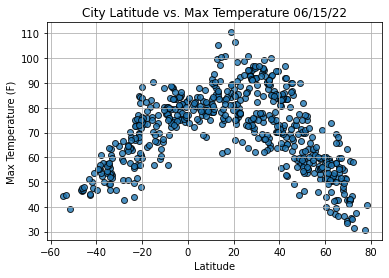

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

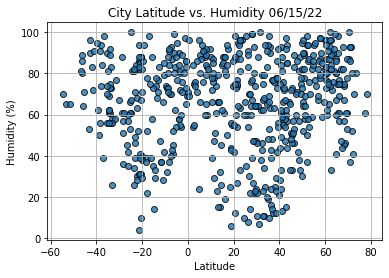

In [20]:

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

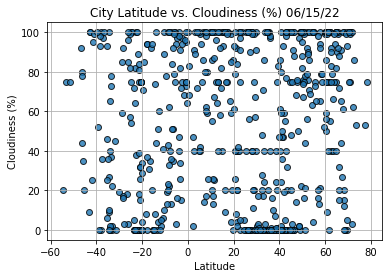

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

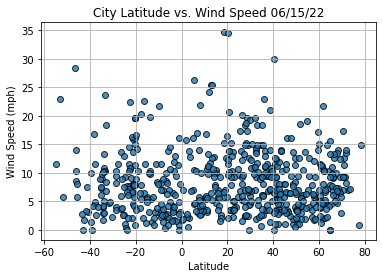

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
       
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(r_value)

In [36]:
# Index 13 data from teh city_data_df
index13 = city_data_df.loc[13]
index13

City                       Serowe
Country                        BW
Date          2022-06-15 17:17:04
Lat                      -22.3833
Lng                       26.7167
Max Temp                    56.75
Humidity                       30
Cloudiness                      0
Wind Speed                   7.65
Name: 13, dtype: object

In [37]:
# Lats >= 0 (Northern Hemisphere)
#city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

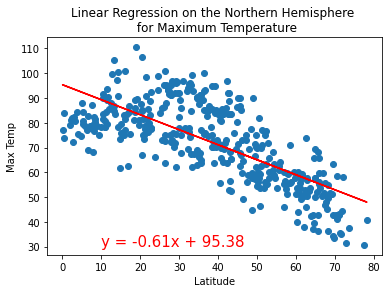

-0.72593305494812


In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,30))


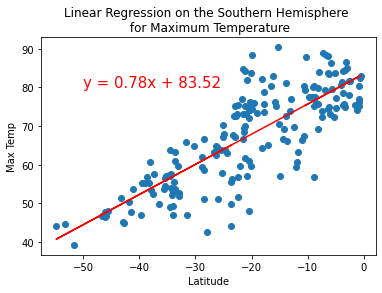

0.8137030762626142


In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))


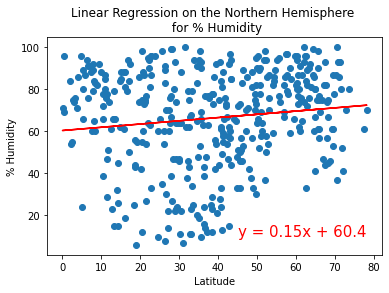

0.12835199721067056


In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,10))


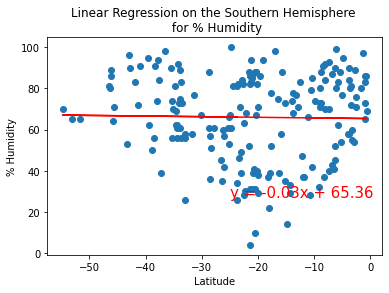

-0.018977811681897952


In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,27))


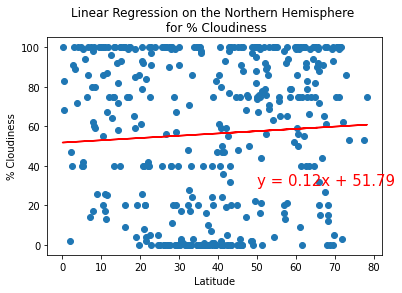

0.058111522398729534


In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(50,30))

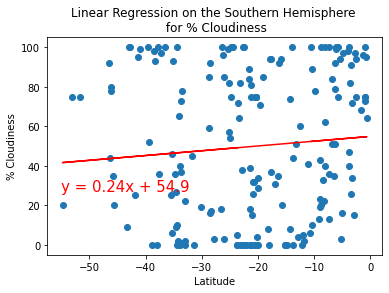

0.08471468299896683


In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,27))

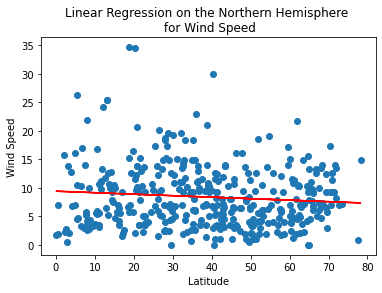

-0.09307251942414846


In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,40))

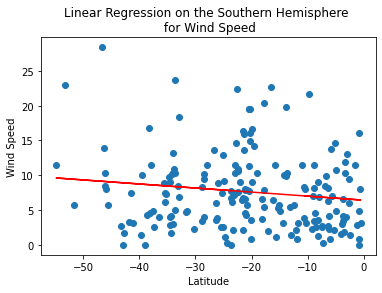

-0.1388309084893819


In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,30))

In [50]:
pip install gmaps

  Using cached gmaps-0.9.0.tar.gz (1.1 MB)

  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076111 sha256=cbf915aa2630b19e2d8c7bcf69614358c73bfbdf0219d714b41301c64f5f86a4
  Stored in directory: c:\users\leafamily\appdata\local\pip\cache\wheels\66\ab\29\3032938612273665f0fa4d2fab4e3ecfe86480eaaa40aaee91
Successfully built gmaps
